<a href="https://colab.research.google.com/github/shriju/creditcard_fraud_detection/blob/main/creditcard_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the dataset

In [ ]:
df=pd.read_csv("/content/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# shape of the dataset: 284807 rows and 31 columns
df.shape

(284807, 31)

In [ ]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Data Preprocessing

In [ ]:
# checking for duplicate data: 1081 duplicates
df.duplicated().sum()

1081

In [ ]:
# dropping the dublicate rows
df.drop_duplicates(keep='first', inplace=True)

In [ ]:
# Now, the dataset does not have any duplicates
df.duplicated().sum()

0

In [ ]:
# shape of the data after removing duplicates
df.shape

(283726, 31)

In [ ]:
# Checking for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# statistical info
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


### Exploratory Data Analysis

---



<ipython-input-11-40e6003ccc36>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount'])


<Axes: xlabel='Amount', ylabel='Density'>

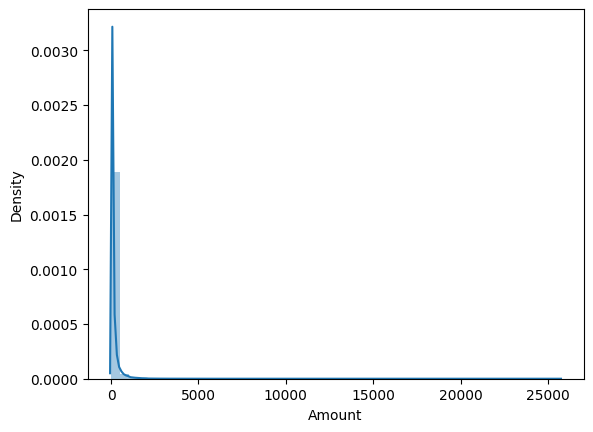

In [ ]:
# creating dist plot for 'Amount' column
sns.distplot(df['Amount'])

<ipython-input-33-7188315ab755>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'])


<Axes: xlabel='Time', ylabel='Density'>

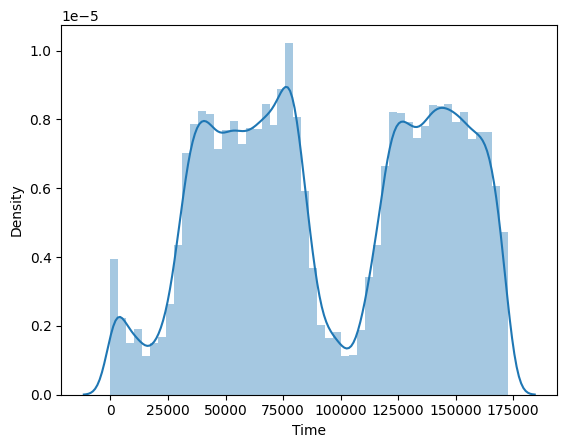

In [ ]:
# creating dist plot for 'Time' column
sns.distplot(df['Time'])

In [ ]:
# checking the distribution of data in the output column: shows that the data is highly imbalanced
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

#### 0 ---> Normal Transaction
#### 1 ---> Fraudulent Transaction
The above distribution shows that the data is highly imbalanced

<Axes: >

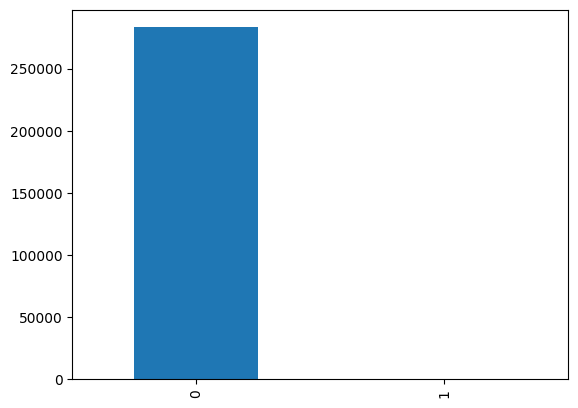

In [ ]:
# highly imbalanced output data through graph
df['Class'].value_counts().plot(kind='bar')

<ipython-input-26-6ca9fe3dc116>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_temp[col], ax=ax[index])
<ipython-input-26-6ca9fe3dc116>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_temp[col], ax=ax[index])
<ipython-input-26-6ca9fe3dc116>:9: UserWarning: 

`distplot` is a deprecated f

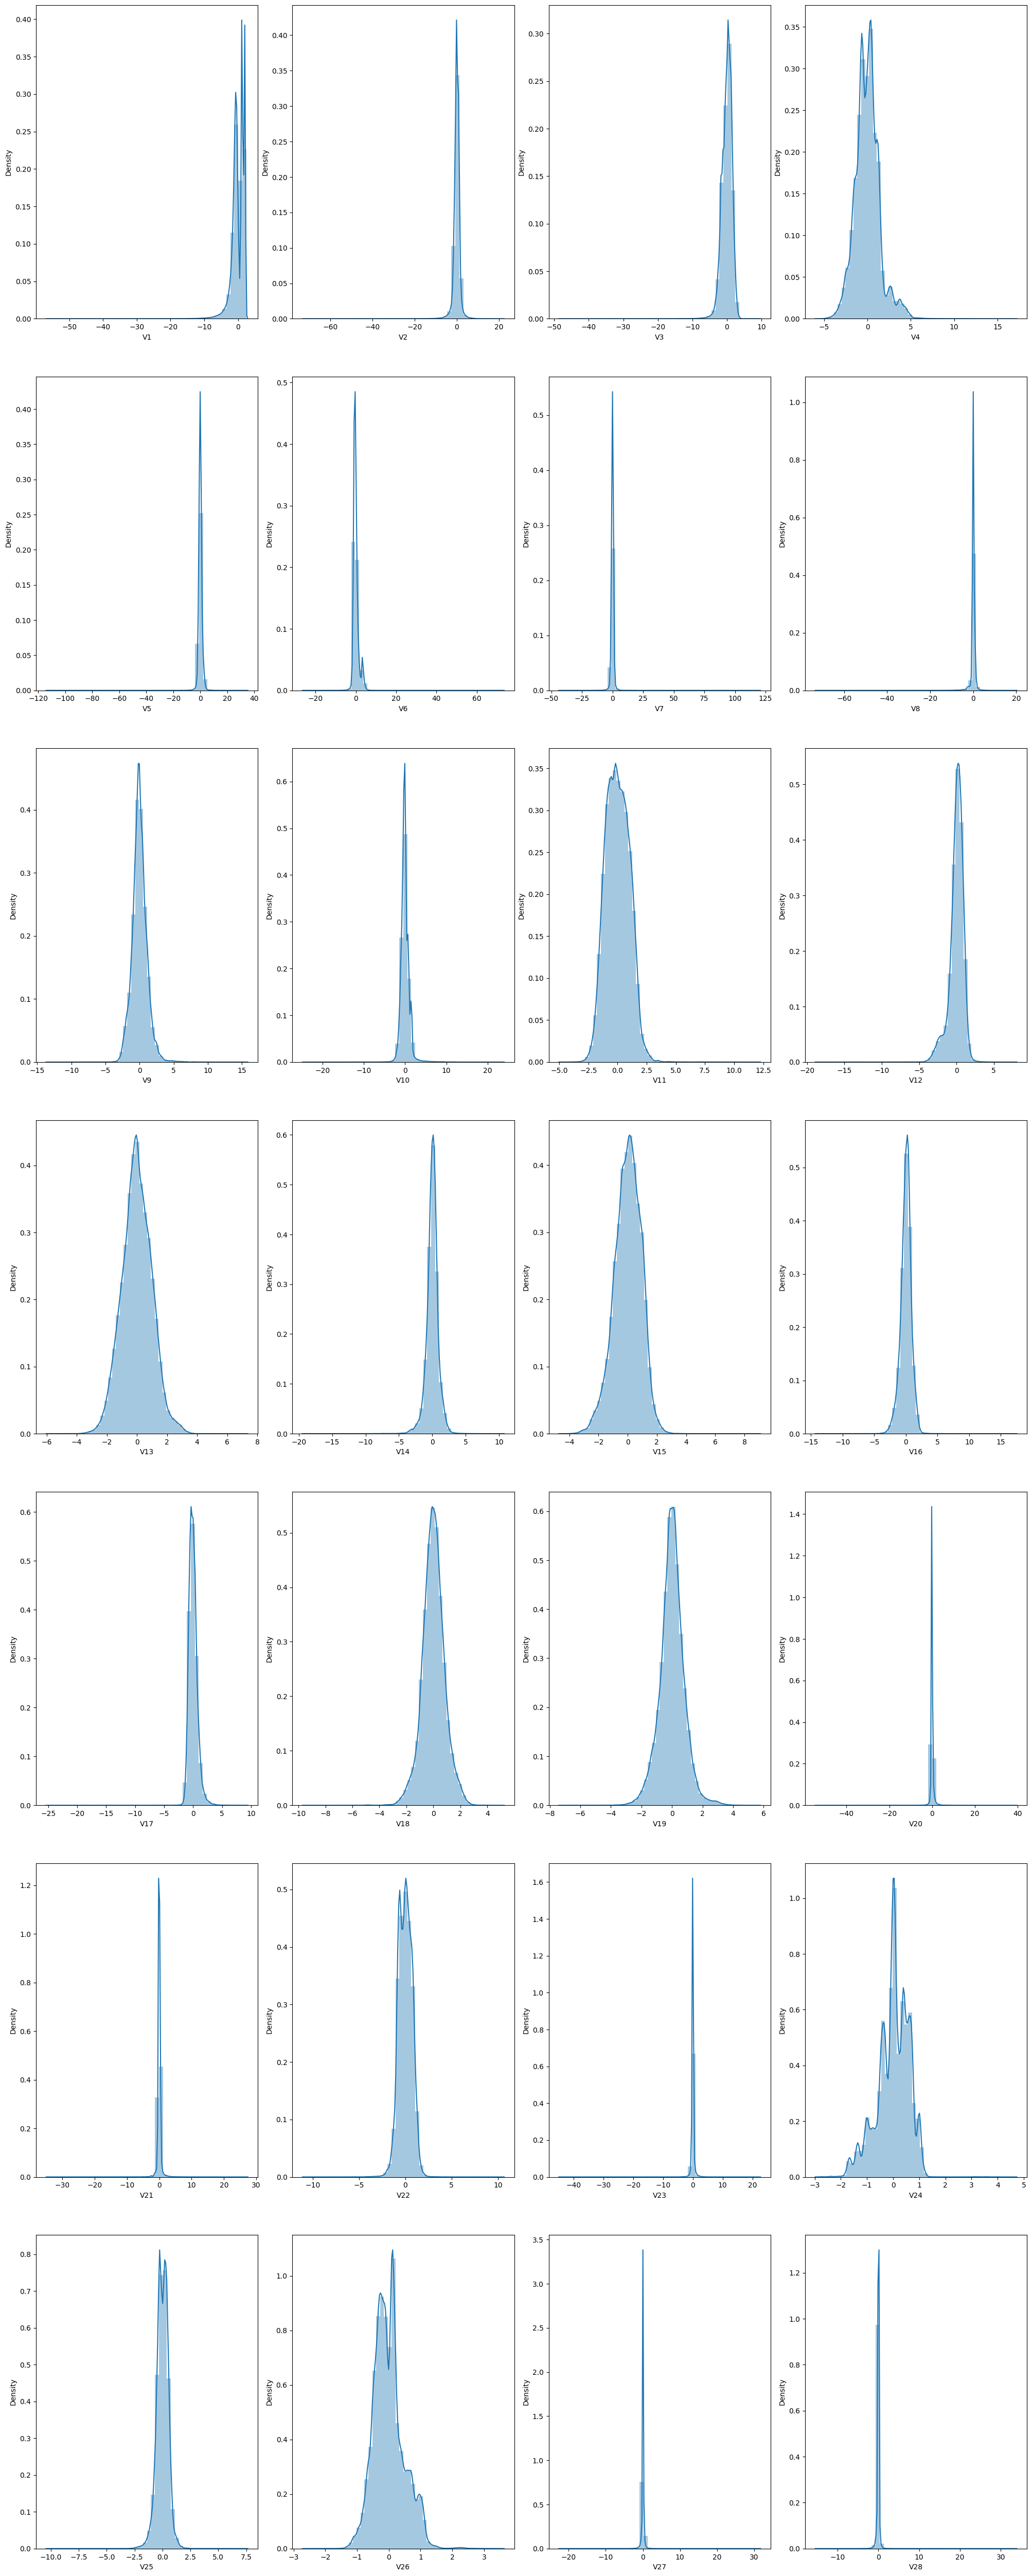

In [ ]:
# dist plot for the remaining columns
df_temp = df.drop(columns=['Time', 'Amount', 'Class'], axis=1)

# create dist plots
fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(20, 50))
index = 0
ax = ax.flatten()

for col in df_temp.columns:
    sns.distplot(df_temp[col], ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)

### Correlation Matrix

In [ ]:
# Correlation with the output column
df.corr()['Class']

Time     -0.012359
V1       -0.094486
V2        0.084624
V3       -0.182322
V4        0.129326
V5       -0.087812
V6       -0.043915
V7       -0.172347
V8        0.033068
V9       -0.094021
V10      -0.206971
V11       0.149067
V12      -0.250711
V13      -0.003897
V14      -0.293375
V15      -0.003300
V16      -0.187186
V17      -0.313498
V18      -0.105340
V19       0.033631
V20       0.021486
V21       0.026357
V22       0.004887
V23      -0.006333
V24      -0.007210
V25       0.003202
V26       0.004265
V27       0.021892
V28       0.009682
Amount    0.005777
Class     1.000000
Name: Class, dtype: float64

<Axes: >

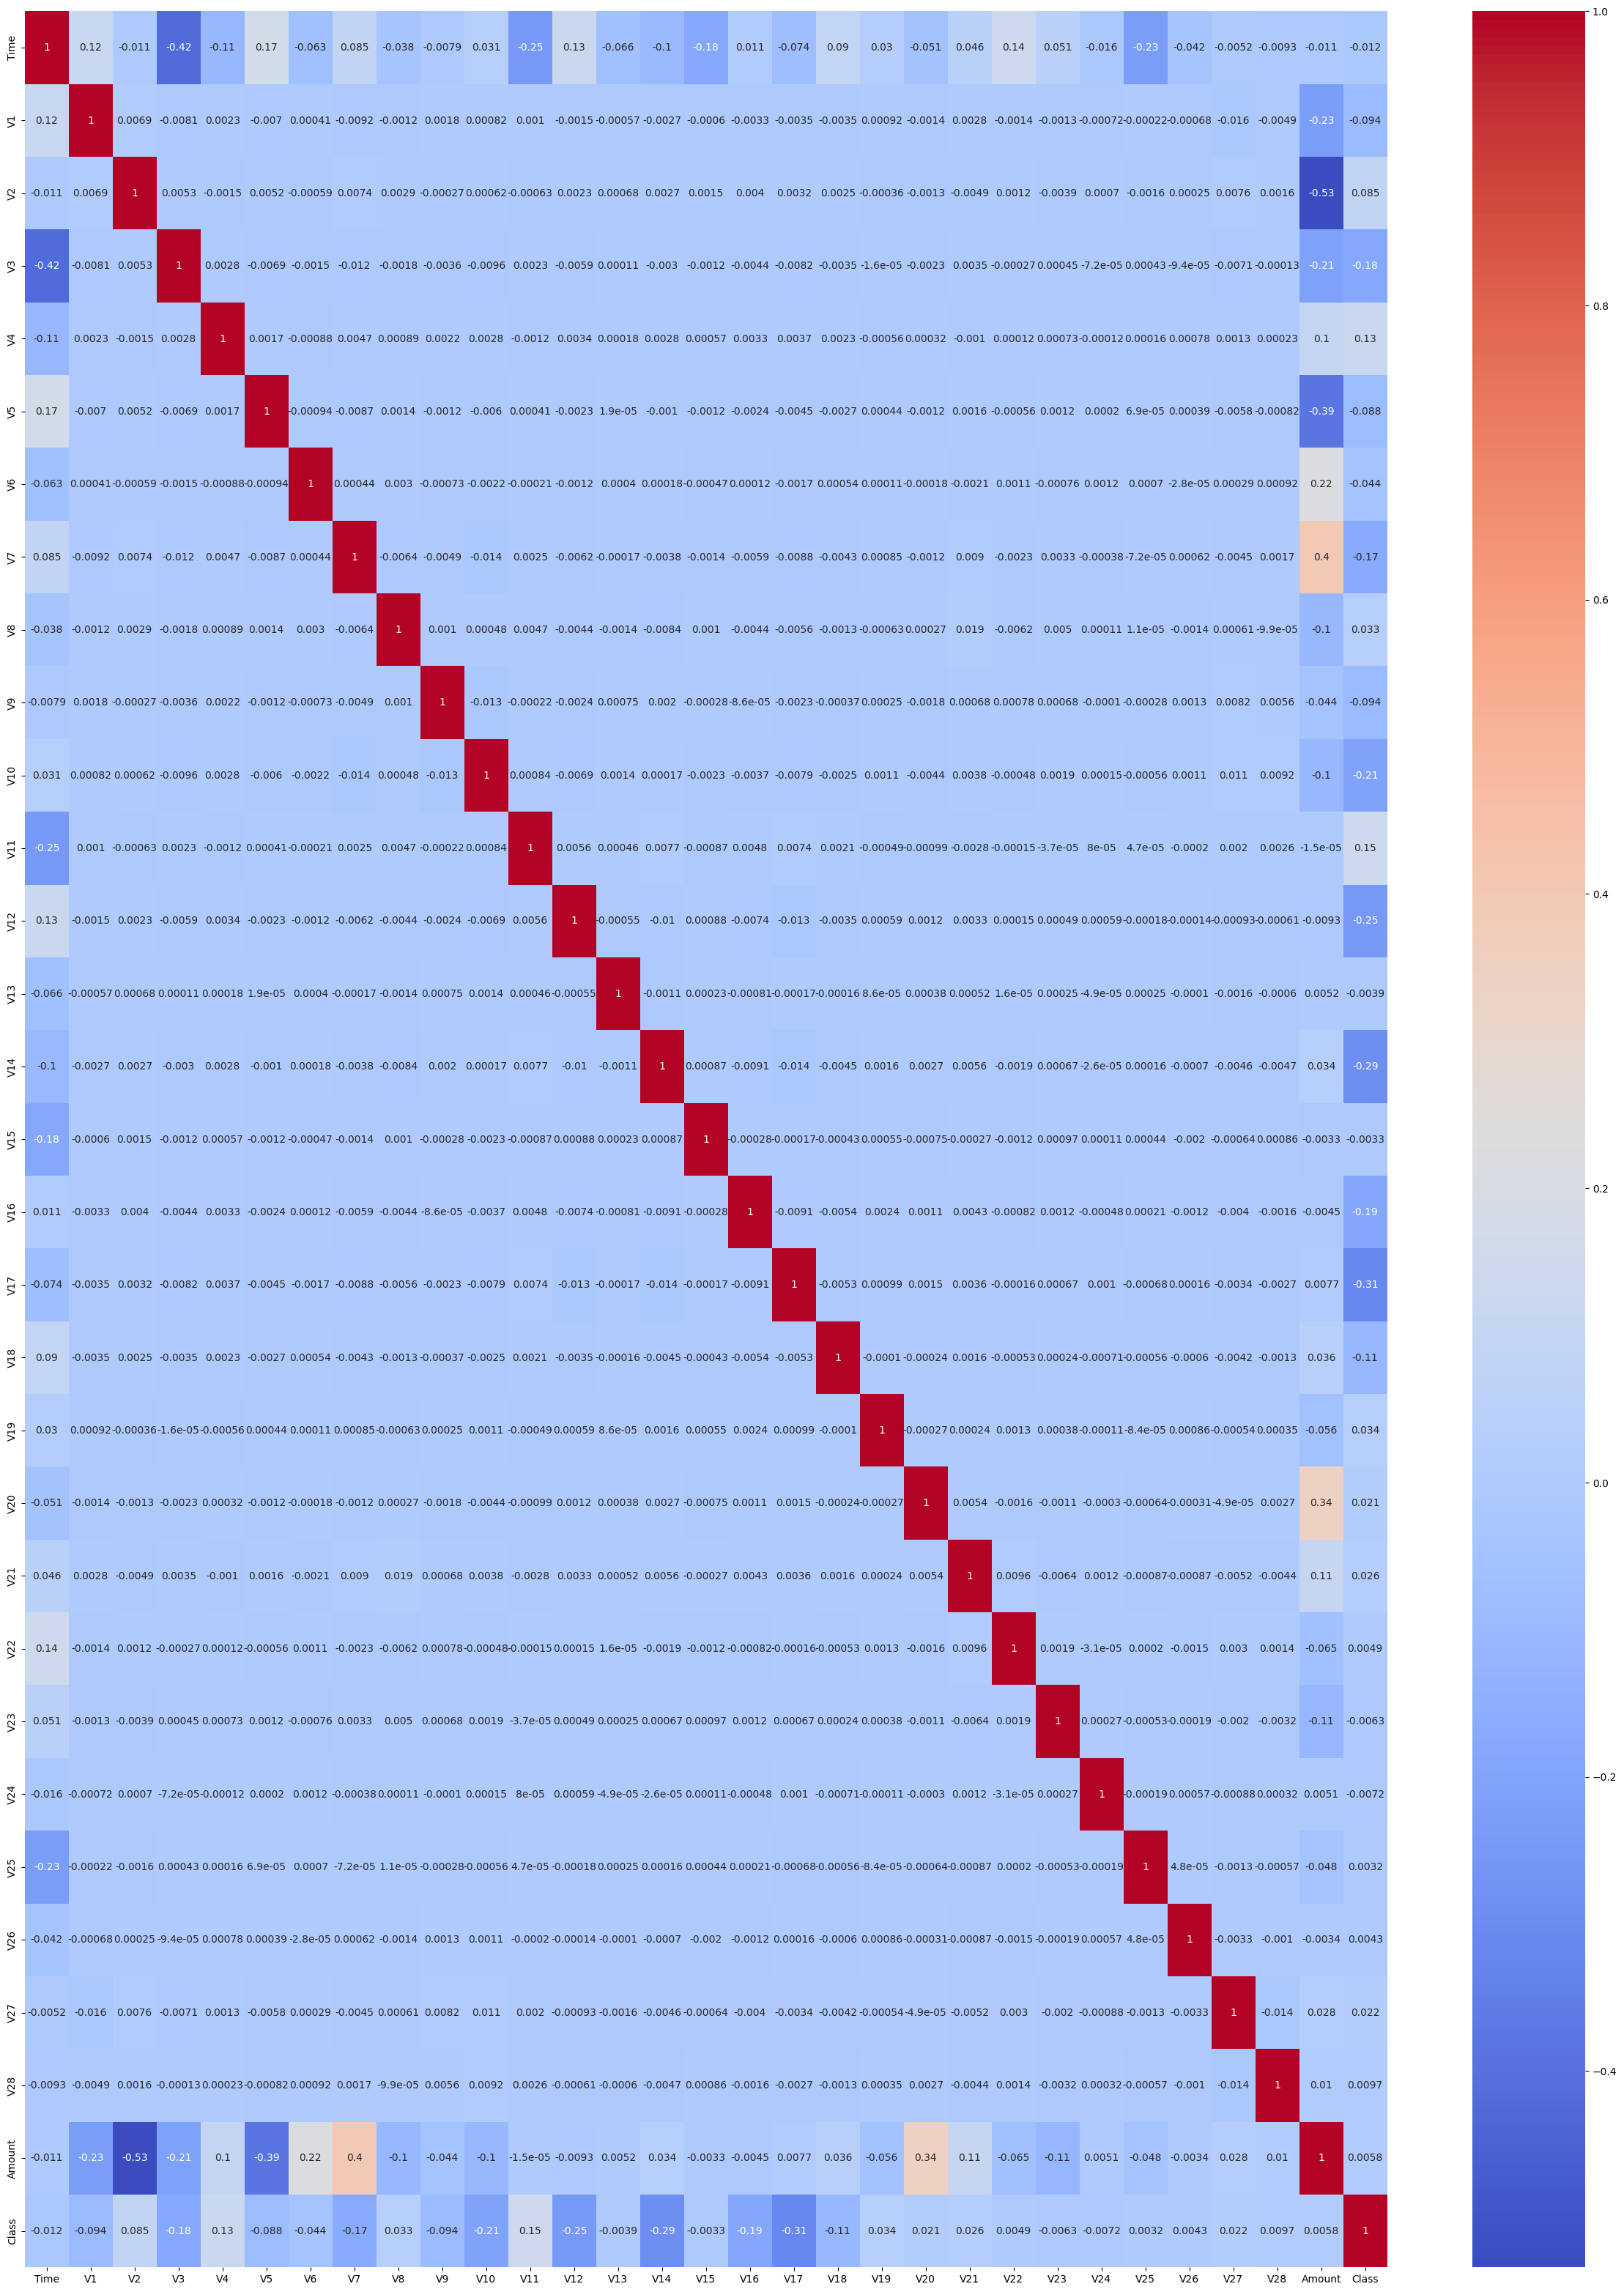

In [ ]:
# Correlation shown in the form of heatmap
corr = df.corr()
plt.figure(figsize=(30,40))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
# splitting the output column: Normal transaction
df_not_fraud=df[df['Class']==0]

In [ ]:

df_not_fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
# statistical measures of the data: Normal transaction for 'Amount'
df_not_fraud['Amount'].describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
# Fradulent transaction
df_fraud=df[df['Class']==1]
df_fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [ ]:
# statistical measures of the data: Fradulent transaction for 'Amount'
df_fraud['Amount'].describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
# compare the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


### UnderSampling
Using undersampling method to build a sample dataset that contains similar distribution as for both normal transactions and Fraudulent Transactions.

Number of Fraudulent Transactions --> 473. So selecting 473 rows randomly from the normal transaction.

In [ ]:
df_not_fraud_sample = df_not_fraud.sample(n=473)

In [ ]:
# merging both fraudulent and normal datasets
new_df = pd.concat([df_not_fraud_sample, df_fraud], axis=0)

In [ ]:
# The 'Class' coloumn (output column) has equal data distribution
new_df['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

<Axes: >

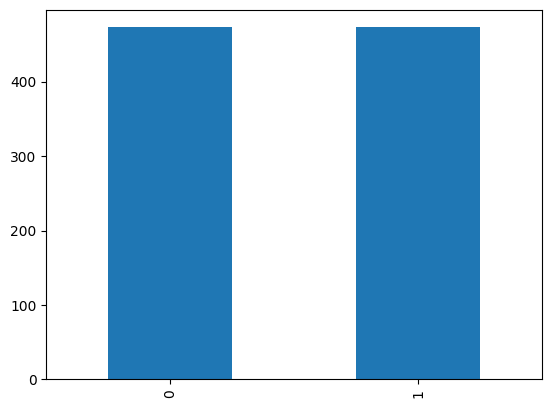

In [ ]:
#plotting the new output distribution
new_df['Class'].value_counts().plot(kind='bar')

In [ ]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97762.720930,0.103957,0.026700,0.021544,-0.012651,0.033467,-0.075072,-0.050192,-0.032883,-0.035416,...,0.014242,0.003923,-0.002274,-0.021475,0.047549,-0.022813,0.003397,0.022275,0.007421,72.289767
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


<ipython-input-47-1a347a289982>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Amount'])


<Axes: xlabel='Amount', ylabel='Density'>

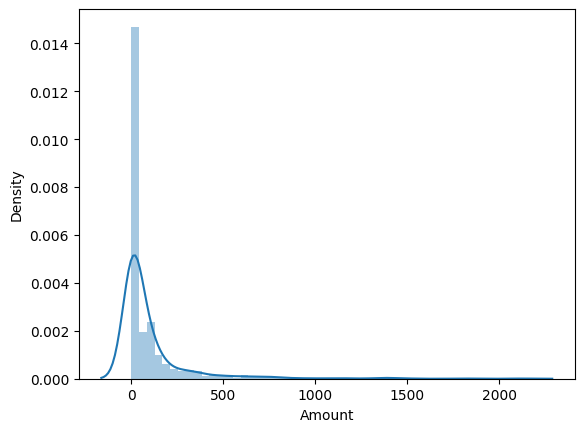

In [ ]:
# Distribution plot for 'Amount' column for the new dataset
sns.distplot(new_df['Amount'])

<ipython-input-48-8e0b212ed2ae>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Time'])


<Axes: xlabel='Time', ylabel='Density'>

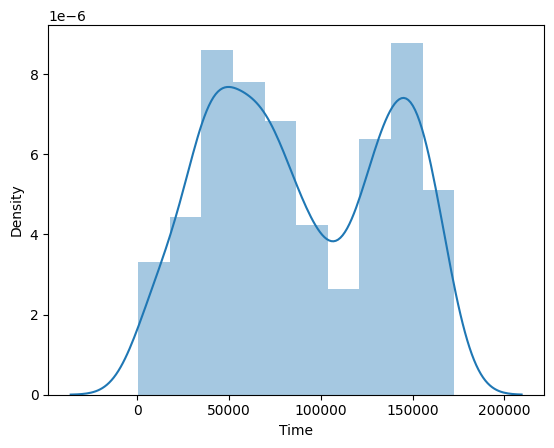

In [ ]:
# Distribution plot for 'Time' column for the new dataset
sns.distplot(new_df['Time'])

### Splitting the data into features and target

In [ ]:
X = new_df.drop(columns=['Class'], axis=1)
y = new_df['Class']

### Applying StandardScaling to normalize the input columns

In [ ]:
from sklearn.preprocessing import StandardScaler
stc = StandardScaler()
x_scaled = stc.fit_transform(X)

In [ ]:
# after scaling:
x_scaled

array([[ 1.5623988 ,  0.81799127, -0.6803726 , ..., -0.17428651,
        -0.24113774, -0.29774021],
       [ 1.08082222,  0.77028337, -0.57408886, ..., -0.15800686,
        -0.27729131, -0.41328533],
       [-1.01315951,  0.21667256, -0.31714224, ..., -0.09540278,
         0.14860084,  0.12408444],
       ...,
       [ 1.66460548,  0.28475432, -0.1682583 , ...,  0.29421058,
         0.35410339, -0.09530025],
       [ 1.67736316, -0.17161238, -0.3224094 , ...,  0.84474005,
        -0.69304956,  0.69345568],
       [ 1.68528744,  0.78426044, -0.44430051, ..., -0.12672115,
        -0.1359113 , -0.26219876]])

### Model Training

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

Applying Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# training
model.fit(X_train, y_train)
# testing
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95        88
           1       0.99      0.91      0.95       102

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190

F1 Score: 0.9489795918367346


Applying Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,
                              random_state=3,
                              max_samples=0.7,
                              max_features=0.70,
                              max_depth=10)
# training
model.fit(X_train, y_train)
# testing
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.90      0.98      0.93        88
           1       0.98      0.90      0.94       102

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190

F1 Score: 0.9387755102040817


Applying XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=25,learning_rate=0.3,max_depth=5)
# training
model.fit(X_train, y_train)
# testing
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        88
           1       1.00      0.90      0.95       102

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190

F1 Score: 0.9484536082474228


Applying Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
bnb = BernoulliNB()


In [ ]:
# training
gnb.fit(X_train, y_train)
# testing
y_pred = gnb.predict(X_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91        88
           1       0.98      0.86      0.92       102

    accuracy                           0.92       190
   macro avg       0.92      0.92      0.92       190
weighted avg       0.92      0.92      0.92       190

F1 Score: 0.9166666666666665


In [ ]:
# training
bnb.fit(X_train, y_train)
# testing
y_pred = bnb.predict(X_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91        88
           1       0.99      0.83      0.90       102

    accuracy                           0.91       190
   macro avg       0.91      0.91      0.91       190
weighted avg       0.92      0.91      0.91       190

F1 Score: 0.9042553191489361


Applying Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5)
# training
dtc.fit(X_train, y_train)
# testing
y_pred = dtc.predict(X_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        88
           1       0.95      0.90      0.92       102

    accuracy                           0.92       190
   macro avg       0.92      0.92      0.92       190
weighted avg       0.92      0.92      0.92       190

F1 Score: 0.9246231155778893


Applying K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
# training
knc.fit(X_train, y_train)
# testing
y_pred = knc.predict(X_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89        88
           1       0.97      0.83      0.89       102

    accuracy                           0.89       190
   macro avg       0.90      0.90      0.89       190
weighted avg       0.90      0.89      0.89       190

F1 Score: 0.8947368421052632


Applying Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', gamma=1.0)
# training
svc.fit(X_train, y_train)
# testing
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.78      0.81      0.79        88
           1       0.83      0.80      0.82       102

    accuracy                           0.81       190
   macro avg       0.80      0.81      0.80       190
weighted avg       0.81      0.81      0.81       190

F1 Score: 0.8159203980099502


Applying AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
# training
abc.fit(X_train, y_train)
# testing
y_pred = abc.predict(X_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        88
           1       0.95      0.90      0.92       102

    accuracy                           0.92       190
   macro avg       0.92      0.92      0.92       190
weighted avg       0.92      0.92      0.92       190

F1 Score: 0.9246231155778893


Applying Voting Classifier (logistic regression, XGBoost Classifier, Random Forest Classifier)

In [ ]:
# Voting Classifier
lgc = LogisticRegression()
xgb = XGBClassifier(n_estimators=25,learning_rate=0.3,max_depth=5)
rfc = RandomForestClassifier(n_estimators=100,
                              random_state=3,
                              max_samples=0.7,
                              max_features=0.70,
                              max_depth=10)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('lgc', lgc), ('xgb', xgb), ('rfc', rfc)],voting='soft')

In [ ]:
# training the model
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('lgc', LogisticRegression()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=25, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                             ('rfc',
                              RandomForestClassifier(max_depth=10,
                                                     max_features=0.7,
                                                     max_samples=0.7,
                                                     random_state=3))],
                 voting='soft')

In [ ]:
# testing the model
y_pred = voting.predict(X_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        88
           1       1.00      0.91      0.95       102

    accuracy                           0.95       190
   macro avg       0.95      0.96      0.95       190
weighted avg       0.96      0.95      0.95       190

F1 Score: 0.9538461538461539


# Applying Stacking(Logistic Regression, XGBoost and Random Forest)

In [ ]:
# imporint the module
from sklearn.ensemble import StackingClassifier

In [ ]:
# Applying stacking
estimators=[('lgc', lgc), ('xgb', xgb)]
final_estimator=RandomForestClassifier()

In [ ]:
stck = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
# training
stck.fit(X_train,y_train)

StackingClassifier(estimators=[('lgc', LogisticRegression()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.3, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=25, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None, ...))],
                   final_estimator=RandomForestClassifier())

In [ ]:
#testing
y_pred = stck.predict(X_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91        88
           1       0.97      0.87      0.92       102

    accuracy                           0.92       190
   macro avg       0.92      0.92      0.92       190
weighted avg       0.92      0.92      0.92       190

F1 Score: 0.9175257731958762


### Out of all the above models selected, Voting Ensamble shows the best prediction with the following outcomes:
                                precision    recall  f1-score   
                    Normal      0.91          1       0.95
                    Fraudulent  1             0.91    0.95       
                    accuracy                           0.95     